Patrick Anker  
Alexandra Kuznetsov  
Conducted: 2016-09-27

# Introduction

This lab studies the relationship between mechanical work and heat energy in a thermodynamical system.

Suppose two objects in a vacuum, one hot and one cold, are placed side-by-side on an insulated table. Over time, the cold object gets warmer, and the hot object gets warmer. This so-called *heat flow* continues until an observer finds that these objects have arrived at *thermal equilibrium* i.e. the two objects' temperatures have become the same.

It is important to note that temperature is **not** the same as heat. Temperature is a description of the average kinetic energy in a system whereas heat is only defined as the transfer of energy related to temperature gradients. However, since heat is a form of energy we can include it in the model of the *internal energy* $\Delta U$, which is the sum total of all kinetic and potential energies in a system. Invoking the First Law of Thermodynamics, the heat, internal energy change, and "work" can all be related thus:

$dU = \tilde{dQ} - \tilde{dW}$

where $\tilde{dQ}$ (or $Q$) and $\tilde{dW}$ (or $W$) are approximate differentials for heat and work, respectively. Work, being any sort of energy input be it mechanical, electrostatic, gravitational, and so on, is defined as such:

$W = \int_a^b \vec{F}\cdot d\vec{s}$

which implies a change of kinetic energy as an integral with no force applied would be zero. So, if the system performs any work, the internal energy of the system will decrease as described by the first law of thermodynamics; conversely, if something does work on the system, the system's internal energy will increase, reflected in the negative sign of $\tilde{dW}$.

# Materials & Methods

This experiment used a pully apparatus to take advantage of the approximately uniform gravitational field in our lab room. The apparatus consists of a metal cylinder affixed to a crank shaft. Inside of the cylinder is an *NTC thermistor*, a resistor whose resistance decreases as temperature increases, attached to two leads. Wrapped around the cylinder is a string with one end tied to a paint bucket and the other tied to a rubber band. This mechanism is affixed to the side of a workbench using a vertical vice grip.

A Fluke multimeter was used to connect to the two leads by the thermistor and measure the resistance (in kilo-Ohms). A secondary vertical vice grip was attached to the workbench to act as an attachment point for the rubber band, providing a steady tension in the string. In order to cool the cylinder, we had a plastic bag filled with 20 pellets of dry ice. A beam balance was available to mass the cylinder. Vernier calipers were available to determine the cylinder's diameter.

To begin the experiment, Sasha and I assembled the main components of the apparatus, making sure everything fit and proper tension was in the string (we wrapped the string ~5 times around). Once the apparatus was configured, I connected and turned on the multimeter to record the resistance at ambient room temperature. We had some false starts since we forgot about the locking bolt on the other end of the cylinder. Once we had the ambient resistance we removed the cylinder, massed it, and measured its diameter. I acquired dry ice, and then we cooled the cylinder until it felt cold in our hands. We decided to do roughly 80kΩ on either side of the room temperature. After reconnecting the cylinder to the apparatus, we waited for the resistance to read roughly room resistance plus 80kΩ. Once that mark hit, Sasha began cranking as I updated the clicker count. Upon reaching room resistance minus ~80kΩ, Sasha stopped turning the crank.

For our second trial in this experiment, we performed almost the exact same routine: cool cylinder, reattach, wait for +80kΩ, then begin cranking. However, before reattaching, we acquired a laser thermometer and applied some graphite to the cylinder's surface to add more friction (supposedly). This time, for every decrease in ~10kΩ, I recorded the temperature reading on the top of the cylinder, aiming at the string. The string was used because the reflectivity of the cylinder was too great for an accurate measurement.

# Results

In [1]:
%pylab inline --no-import-all
from scipy import stats
import psalib

Populating the interactive namespace from numpy and matplotlib


In [25]:
# Global constants
PI   = np.pi
g    = 9.80
C_Al = 0.220 # cal * g / °C
CAL  = 4.186 # J / cal

Raw data

In [118]:
# materials and equipment measurements
M_bucket  = 6679  # g
sM_bucket = 5     

d_cyl     = 4.812 # cm
sd_cyl    = 0.002 

m_cyl     = 203.5 # g
sm_cyl    = 0.1

R_s       = 0.1   # kΩ
T_s       = 0.1   # °C

# trial 1 data
Ri_1      = 163.0 # kΩ
R_room    = 111.2 # kΩ

Rf_1      = 79.0  # kΩ
n_1       = 300. - 62.

# trial 2 data
n_2       = 33979. - 33681.
T_2       = np.array([16.0, 17.6, 18.6, 20.0, 21.2, 22.7, 24.1, 25.7, 27.7])
R_2       = np.array([160., 151., 141., 131., 121., 111., 101., 91., 81.])

In [119]:
# helper functions
def work(M, sM, R, sR, N):
    """
    Returns W ± dW in Joules
    """
    
    W   = 2*PI*M*g*R*N
    dW2 = ((2*PI*g*R*N)*(sM))**2 + ((2*PI*M*g*N)*(sR))**2 + ((2*PI*M*g*R)*(np.sqrt(N)))**2
    return (W, np.sqrt(dW2))

def heat(m, sm, delT, sdelT):
    """
    Returns Q ± dQ in calories
    """
    Q   = m*C_Al*delT
    dQ2 = ((C_Al * delT)*sm)**2 + ((m*C_Al)*(2*T_s))**2
    
    return (Q, np.sqrt(dQ2))

Generate a linear fit of the reference table at the end of the lab writeup

In [120]:
RAW_R = [207850, 197560, 187840, 178650, 169950, 161730, 153950, 146580,
         139610, 133000, 126740, 120810, 115190, 109850, 104800, 100000, 
          95447,  91126,  87022,  83142,  79422]
RAW_R = np.array(RAW_R) / 1e3
RAW_T = np.arange(10, 31, 1)

RAW_B, RAW_M, RAW_SY, RAW_SB, RAW_SM, RAW_r = psalib.lsq(RAW_R, RAW_T)

Now determine the work and heat expended and added, respectively

In [121]:
W, sW = work(M_bucket / 1000, sM_bucket / 1000, (d_cyl/2) / 100, (sd_cyl / 2) / 100, n_1)
print('%f ± %f J' % (W, sW))

2354.994882 ± 152.664963 J


In [122]:
Q, sQ = heat(m_cyl, sm_cyl, RAW_M*(Rf_1 - Ri_1), RAW_SM*2*R_s)
print('%f ± %f J' % (Q*CAL, sQ*CAL))

2444.362467 ± 37.500686 J


Determine the change in internal energy in the system

In [123]:
dU  = (Q*CAL) - W
sdU = (sQ*CAL) + sW
print('ΔU: %4.3f ± %3.3f J' % (dU, sdU))

ΔU: 89.368 ± 190.166 J


Results for trial 2

Linear correlation: 0.994934


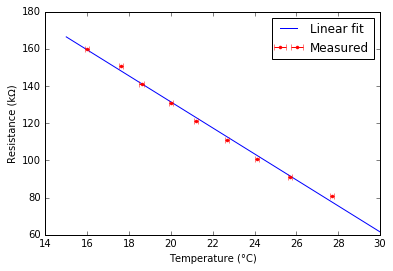

In [124]:
b, m, sy, sb, sm, r = psalib.lsq(T_2, R_2)

x_vals = np.linspace(15, 30, 1000)
plt.plot(x_vals, m*x_vals + b, 'b-', label='Linear fit')

plt.errorbar(T_2, R_2, xerr=T_s, fmt='r.', label='Measured')

plt.xlabel('Temperature (°C)')
plt.ylabel('Resistance (kΩ)')
plt.legend(loc='upper right')

print('Linear correlation: %0.6f' % (r))

In [125]:
W2, sW2 = work(M_bucket / 1000, sM_bucket / 1000, (d_cyl/2) / 100, (sd_cyl / 2) / 100, n_2)
print('%f ± %f J' % (W2, sW2))

2948.691070 ± 170.831746 J


In [126]:
Q2, sQ2 = heat(m_cyl, sm_cyl, T_2[len(T_2) - 1] - T_2[0], T_s)
print('%f ± %f J' % (Q*CAL, sQ*CAL))

2444.362467 ± 37.500686 J


ΔU in trial 2: -756.027 ± 208.329 J


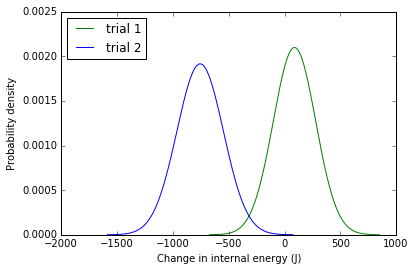

In [127]:
dU2  = (Q2*CAL) - W2
sdU2 = (sQ2*CAL) + sW2
print('ΔU in trial 2: %4.3f ± %3.3f J' % (dU2, sdU2))

x_vals   = np.linspace(dU - (4*sdU), dU + (4*sdU), 1000)
x_vals_2 = np.linspace(dU2 - (4*sdU2), dU2 + (4*sdU2), 1000)

plt.plot(x_vals, mlab.normpdf(x_vals, dU, sdU), 'g-', label='trial 1')
plt.plot(x_vals_2, mlab.normpdf(x_vals_2, dU2, sdU2), 'b-', label='trial 2')

plt.xlabel('Change in internal energy (J)')
plt.ylabel('Probability density')
plt.legend(loc='upper left')

# Discussion

As demonstrated above, the two trials differed greatly in their change in internal energies ($\Delta U$). This is something that must be investigated. Although we linearly approximated the relation between the resistance and temperature in the "Thermistor Specifications" table, it's necessary to verify the validity of this approximation.

Correlation coefficient: 0.979387


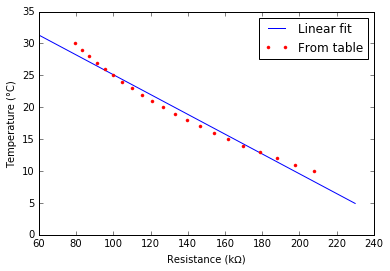

In [128]:
x_vals = np.linspace(60, 230, 1000)

plt.plot(x_vals, RAW_M*x_vals + RAW_B, 'b-', label='Linear fit')
plt.plot(RAW_R, RAW_T, 'r.', label='From table')

plt.xlabel('Resistance (kΩ)')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper right')

print('Correlation coefficient: %f' % (RAW_r))

It's safe to say that with a correlation coefficient $r$ of around $.98$ our linear fit for the table is not out of the realm of impossibility. Had we used a wider resistance range, this approximation would have become invalid rather quickly. Furthermore, the resolution of the data provided to us was very helpful. Had the kilo-Ohm resistance step been wider (i.e. the temperature step been wider) the resolution on the linear regression would have been compromised, yielding bad approximations of the temperature from the thermistor. Moreover, if the temperature step were smaller, the data would definitely help the regression line, but it's likely that the linear fit would not have worked as well.

Firstly in our analysis, we should compare the heat changes ($Q$) between the two trials:

ΔT (trial 1): 13.043 ± 0.2 °C
ΔT (trial 2): 11.700 ± 0.2 °C


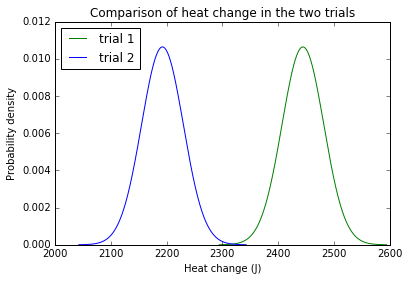

In [129]:
x_vals   = np.linspace(Q*CAL - (4*CAL*sQ), Q*CAL + (4*CAL*sQ), 1000)
x_vals_2 = np.linspace(Q2*CAL - (4*CAL*sQ2), Q2*CAL + (4*CAL*sQ2), 1000)

plt.plot(x_vals, mlab.normpdf(x_vals, Q*CAL, sQ*CAL), 'g-', label='trial 1')
plt.plot(x_vals_2, mlab.normpdf(x_vals_2, Q2*CAL, sQ2*CAL), 'b-', label='trial 2')

plt.title('Comparison of heat change in the two trials')
plt.xlabel('Heat change (J)')
plt.ylabel('Probability density')
plt.legend(loc='upper left')

print('\u0394T (trial 1): %2.3f ± %0.1f \u00B0C\n\u0394T (trial 2): %2.3f ± %0.1f \u00B0C' % 
      (RAW_M*(Rf_1 - Ri_1), 2*T_s, T_2[len(T_2) - 1] - T_2[0], 2*T_s))

The heat changes do not differ too much, which makes sense considering that the difference in temperature in the first trial was larger than the difference in the second. Since the internal energy $\Delta U$ is equal to $Q - W$ it makes sense that the internal energy of the second trial was less than the first. However, it does not compensate for the massive change that was observed, from an increase in internal energy to a net loss in internal energy. Next, we should inspect the work:

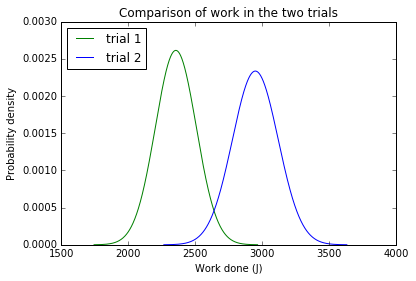

In [130]:
x_vals   = np.linspace(W - (4*sW), W + (4*sW), 1000)
x_vals_2 = np.linspace(W2 - (4*sW2), W2 + (4*sW2), 1000)

plt.plot(x_vals, mlab.normpdf(x_vals, W, sW), 'g-', label='trial 1')
plt.plot(x_vals_2, mlab.normpdf(x_vals_2, W2, sW2), 'b-', label='trial 2')

plt.title('Comparison of work in the two trials')
plt.xlabel('Work done (J)')
plt.ylabel('Probability density')
plt.legend(loc='upper left')

Since the number of crank rotations in the second trial were greater than the number in the first trial, it's evident that the work done in the second trial was greater than that in the first. Finally, to properly gauge what happened, a comparison between theory and experiment should be performed. Ideally, there is no change in internal energy if the mechanical equivalent of heat is achieved perfectly; that is to say $Q = W$ and therefore, for this experiment, we need to compare the number of crank turns:

$N = \frac{mc\Delta T}{2πMgR}$

Theoretical turns for:
-> 1: 247
-> 2: 222


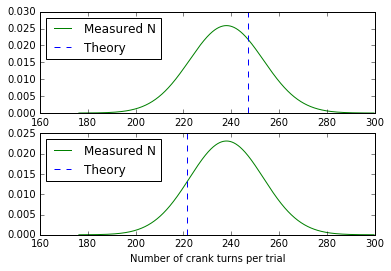

In [160]:
# trial 1
N_1_theory = (CAL*(m_cyl / 1000) * (C_Al*1e3) * (RAW_M*(Rf_1 - Ri_1)))/(2*PI*(M_bucket/1000)*g*(d_cyl/200))

# trial 2
N_2_theory = (CAL*(m_cyl / 1000) * (C_Al*1e3) * (T_2[len(T_2) - 1] - T_2[0]))/(2*PI*(M_bucket/1000)*g*(d_cyl/200))

x_vals   = np.linspace(n_1 - (4*np.sqrt(n_1)), n_1 + (4*np.sqrt(n_1)), 1000)
x_vals_2 = np.linspace(n_2 - (4*np.sqrt(n_2)), n_2 + (4*np.sqrt(n_2)), 1000)

plt.figure(1)
plt.subplot(2, 1, 1)

plt.plot(x_vals, mlab.normpdf(x_vals, n_1, np.sqrt(n_1)), 'g-', label='Measured N')
plt.axvline(x=N_1_theory, ls='--', label='Theory')
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)

plt.plot(x_vals, mlab.normpdf(x_vals_2, n_2, np.sqrt(n_2)), 'g-', label='Measured N')
plt.axvline(x=N_2_theory, ls='--', label='Theory')
plt.xlabel('Number of crank turns per trial')
plt.legend(loc='upper left')

print('Theoretical turns for:\n-> 1: %3.0f\n-> 2: %3.0f' % (N_1_theory, N_2_theory))

It follows that our data was not as outlandish as it could have been, but it's important to discuss what factors could have contributed to these deviations from the theory. First and foremost, our cylinder was not entirely insulated. Any amount of built-up heat from friction could have escaped into the air surrounding the cylinder. Furthermore, we did not know the true physical properties of the shoestring wrapped around the cylinder to generate the friction. Some of the heat probably escaped into the string, and the string's temperature may not have change proportionally to the cylinder's temperature. I suspect the string would have acted as some form of insulation ideally, but in order to make the experiment better, I'd recommend using a thicker rope for better insulation and less environmental anomalies.

An adendum to the statement about insulation and minimising environmental anomalies would be about centering the temperature differences about room temperature. Since the magnitude of temperature gradients affect the rate heat is transfered from hot to cold, it makes sense that we organised the experiment about room temperature. Had we used an very low temperature and then ended at room temperature, more environmental anomalies would have present as more heat from the room's air affected the cylinder.

This latter part was probably not the case for our experiment considering that we measured the temperature readings in the second trial from the top of the cylinder, on top of the shoestring. In fact, since its reflectivity was not as harsh as the cylinder, it was reporting an accurate enough reading for our trial. It's probable that the heat conductivity and capacitance of the string and cylinder are approximately similar, though since the string is not a conductive metal, it most likely has a slightly higher heat capacitance. This is probably why our temperature measurements for the second trial were more linear than the first trial's, which depended on the theory alone.

We should also consider the posibility that moisture got involved in the second trial. As Sasha applied the graphite shavings to the cylinder, some leftover water that condensed on the bottom of the dry ice bag may have been absorbed into the paper towel; so when the shavings were applied (and supposedly the cylinder was wet) some moisture remained, which would have increased the effective heat capacitance of the cylinder, requiring more crank turns to achieve the desired temperature difference. This is reflected in the graph above.

In our first trial, we used the crank shaft slowly at first because Sasha and I were getting used to syncing her crank to my clicker increase. The slower cranking probably contributed to the slight leftward shift in the graph above because any heat generated by the friction would have been small enough for the air to complete negate it. However, the work was still done. This is most likely why our crank number was slightly lower than theorised.

One final note is on the construction of the cylinder itself. While we used the resistance to determine the temperature, the temperature reading would have been from the thermistor itself, not the cylinder. The cylinder would not have heated uniformly. Heat transfers radially from a source as exponential decay. It follows that the friction on the cylinder would have radially transfered inward in an exponential decay fashion over time. Thus, our surface temperature readings in the second trial would have not have completely matched the temperature as interpreted by the thermistor.

# Conclusion

This lab demonstrated how difficult it can be to reconcile all the degrees of freedom in a thermodynamical system, especially one that interacts with a non-vacuum medium. At first, I believed the data we recovered was very problematic – to the point of absolutely worthless – due to the shape of our $\Delta U$ comparison graphs. It wasn't until I compared the data with the theory that the perspective snapped back into place. True, we had some slip-ups, but overall they did not compromise our data. Had we performed this experiment again, I would have used some sort of cloth to absorb the moisture on the cylinder to lessen the effects of residual moisture and heat transfer from my body. It's impossible to achieve a pure $Q = W$ system due to the second law of thermodynamics, but considering that we got fairly close, I think it's safe to say that this lab effectively demonstrated the mechanical equivalent of heat.